# 逻辑斯蒂回归（LR）
## 1 简介-使用 sigmoid 函数计算概率
许多问题需要概率估计作为输出。逻辑回归是一种极其有效的概率计算机制。实际上，您可以通过以下两种方式使用返回的概率：
1. “按原样”应用。例如，如果垃圾邮件预测模型将电子邮件作为输入并输出值为 0.932，则这意味着该电子邮件为垃圾邮件的概率为 93.2%。
2. 转换为二元类别，例如“真”或“假”、“垃圾邮件”或“非垃圾邮件”。
这个笔记重点在第一个输出方式
### 1.1 Sigmoid 函数
您可能想知道逻辑回归模型如何确保其输出代表概率，始终输出 0 到 1 之间的值。碰巧，有一系列称为逻辑函数的函数，其输出具有相同的特征。标准 Logistic 函数，也称为 sigmoid 函数（sigmoid 的意思是“S 形”），其公式为：
$$f(x) = \frac{1}{1+e^{-x}}$$


<function matplotlib.pyplot.show(close=None, block=None)>

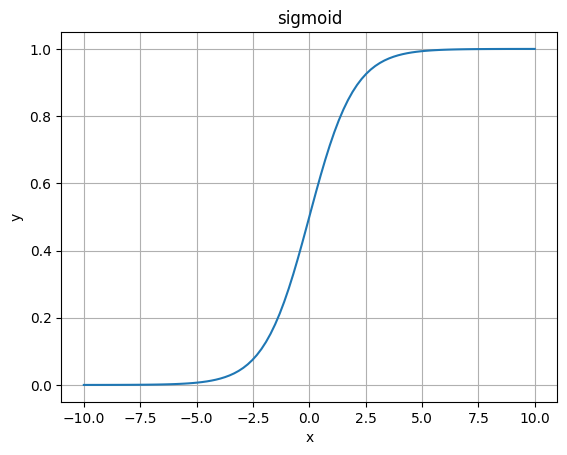

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)
plt.title("sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show

### 1.2 使用sigmoid转换线性输出
下面是逻辑斯蒂回归的线性部分
$$z = b +w_1x_1 + w_2x_2 + w_3x_3 + ... + w_Nx_N$$
接下来是转换
$$y'=\frac{1}{1+e^{-z}}$$
$$z = $$

## 2 损失和正则化
逻辑回归模型使用与线性回归模型相同的过程进行训练，有两个主要区别：
1. 逻辑回归模型使用[**对数损失**](###-2.1-Log-Loss)作为损失函数，而不是平方损失。 
2. 应用**正则化**对于防止过度拟合至关重要。

### 2.1 Log Loss
在线性回归模型中，您使用平方损失（也称为 L2 损失）作为损失函数。*平方损失非常适合输出值变化率恒定的线性模型。*
然而，逻辑回归模型的变化率并不是恒定的。正如您在计算概率中所看到的，S 型曲线是 S 形的而不是线性的。当对数赔率$z$值越接近0，则小幅增加$z$导致$y$的更大的变化，当$z$是一个大的正数或负数的时候,情况相反，而且要求精度很高。
如果您使用平方损失来计算 sigmoid 函数的误差，随着输出越来越接近 0 和 1，您将需要更多内存来保留跟踪这些值所需的精度。相反，逻辑回归的损失函数是对数损失。对数损失方程返回变化幅度的对数，而不仅仅是数据到预测的距离。对数损失计算如下：
$$Log Loss=\Sigma_{(x,y)}-ylog(y')-(1-y)log(1-y')$$

### 2.2 Regularization in logistic regression
正则化是一种在训练期间惩罚模型复杂性的机制，在逻辑回归建模中极其重要。如果没有正则化，在模型具有大量特征的情况下，逻辑回归的渐近性质将继续将损失推向 0。因此，大多数逻辑回归模型使用以下两种策略之一来降低模型复杂性：
1. L2正则化 
2. 提前停止：限制训练步骤数，在损失仍在减少时停止训练。


## 3 简单使用
回归模型：$f(x) = \frac{1}{1+e^{-wx}}$

其中wx线性函数：$wx =w_0\cdot x_0 + w_1\cdot x_1 + w_2\cdot x_2 +...+w_n\cdot x_n,(x_0=1)$

In [3]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [12]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    #print(data)
    return data[:,:2], data[:,-1]
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])#解包操作
        return data_mat

    def fit(self, X, y):
        # label = np.mat(y)
        data_mat = self.data_matrix(X)  # m*n
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))
                error = y[i] - result
                self.weights += self.learning_rate * error * np.transpose(
                    [data_mat[i]])
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [16]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

/var/folders/pl/ldmtqhjj0z96x86x2qwd0qpw0000gn/T/ipykernel_32141/3681355969.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + exp(-x))


LogisticRegression Model(learning_rate=0.01,max_iter=200)


1.0

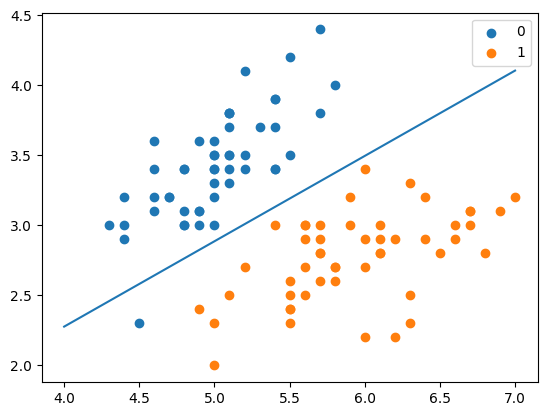

In [17]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()